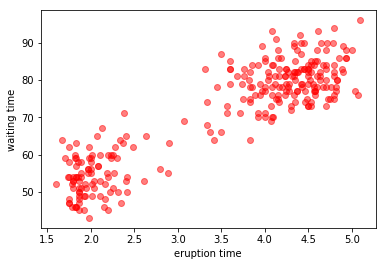

In [16]:
data=[[], []]
f=open('faithful.dat')
for line in f:
    line=line.split()
    if not line or not line[0].isdigit(): continue
    data[0].append(float(line[1]))
    data[1].append(int(line[2]))

import matplotlib.pyplot as plt
plt.plot(data[0], data[1], 'ro', alpha=0.5)
plt.xlabel('eruption time')
plt.ylabel('waiting time')
plt.show()

In [29]:
import random
# def random_parameters(data):
#     cols = (data.shape)[1]
     
#     # Random assignment of mu's between 0 and 1
#     mu = np.zeros((K, cols))
#     for k in range(K):
#         for l in range(cols):
#             mu[k][l]=rd.random()   
    
#     # Sigma values are calculated by selecting a random subset of 
#     # data array and taking the covariance of it
#     sigma = []
#     for k in range(2):
#         sigma.append(np.cov(data[:20+int(rd.random()*(len(data)-20))].T))
    
#     # pi is a random array of size 2 summing up to 1
#     pi = np.zeros(2)
#     pi[0] = rd.random()
#     pi[1] = 1- pi[0]

#     return mu, sigma, pi
def random_start(data):
    x_min,x_max=sorted(data[0])[0],sorted(data[0])[-1]
    mu1,mu2=[x_min+random.random()*(x_max-x_min) for i in range(2)]
    sigma1,sigma2=[[1,0],[0,1]],[[1,0],[0,1]]
    pi=0.5
    return mu1,mu2,sigma1,sigma2,pi
random_start([[1,2],[1,2]])

(1.3742186790434028,
 1.1989461392116363,
 [[1, 0], [0, 1]],
 [[1, 0], [0, 1]],
 0.5)

In [ ]:
def gaussian(x, mu, sigma):
    dim = len(x)
    norm_factor = (2*np.pi)**dim
    norm_factor *= np.linalg.det(sigma)
    norm_factor = 1.0/np.sqrt(norm_factor)
    x_mu = np.matrix(x-mu)
    rs = norm_factor*np.exp(-0.5*x_mu*np.linalg.inv(sigma)*x_mu.T)
    return rs
def e_step(data, mu, sigma, pi):    
    gamma=[]
    for i in range(len(data[0])):
        likelihood = (((1-pi)*gaussian([data[0][i],data[1][i]], mu1, sigma1)) + (pi*gaussian([data[0][i],data[1][i]], mu2, sigma2))) 
        gamma.append(pi[0]*gaussian(data[i], mu[0], sigma[0])/likelihood)
    
    return resp